In [59]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");

v2.1
v2.1


In [77]:
DT, v0, DR, N, Lx, ϕa, ϕp, δt, δ = (1.0, 20.0, 1.0, 25, 2.0, 0.3, 0.6, 1e-5, 0.01);
T = 5.0
pde_name = "test"
save_interval = 0.01
pde_param = new_pde_param(DT, v0, DR, N, Lx, ϕa, ϕp, δt, δ; T = T, name = pde_name, save_interval = save_interval, save_on = true);
#load_and_run_pde(pde_param)
pde_ts, f_saves = load_compress_pde(pde_param)
t_pde, f_pde = pde_ts[end], f_saves[end]

fast load


(5.000009999979879, [0.213635296355855 0.14404976549390672 0.5345968672304249; 0.2041095738145863 0.1423793700830835 0.5400926273658595; … ; 0.22522655969920755 0.148365083575532 0.5301864903889371; 0.22086207935857938 0.14608626687370688 0.5311617252467353])

In [73]:
DT, v0, DR, N, Lx, Ly, ϕa, ϕp = (1.0, 20.0, 1.0, 100, 2.0, 0.5, 0.3, 0.6);
T = 5.0
sim_name = "sim_run_2"
save_interval = 0.001
sim_param = new_sim_param(DT, v0, DR, N, Lx, Ly, ϕa, ϕp; T = T, name = sim_name, save_interval = save_interval, save_on = true);
#load_and_run_sim(param)
sim_ts, η_saves = load_compress_sim(sim_param)
t_sim, η = sim_ts[end], η_saves[end]

fast load


(4.999000003891016, [1.0 1.0 … 1.0 0.0; 1.0 1.0 … 0.0 0.0; … ; 1.0 1.0 … 1.0 0.0; 0.0 0.0 … 1.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

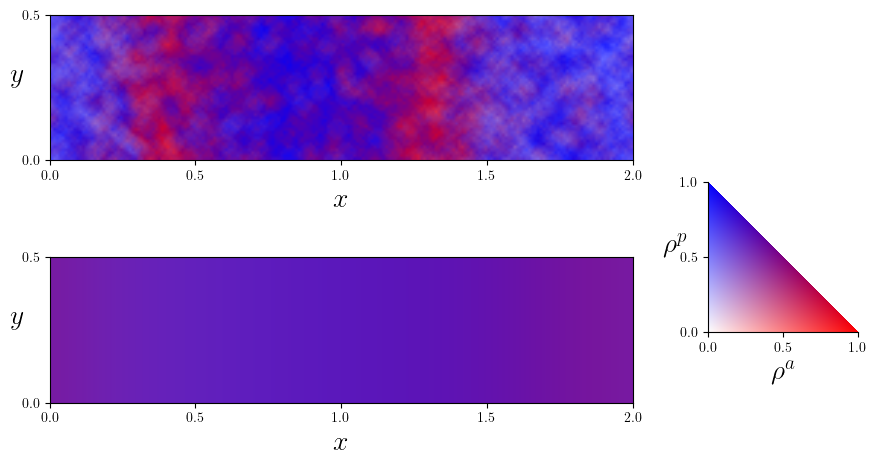

In [61]:
#create image    
    @unpack DT, v0, DR, N, Lx,Ly, ϕa, ϕp, T , name, N₁, N₂, save_interval, save_on = sim_param
    ϵ = 0.1
    f_sim = local_average(η, ϵ, N, N₁, N₂)
    sim_rgb_image = rho_to_rgb(f_sim);

    @unpack DT, v0, DR, N, Nx, Lx, ϕa, ϕp, T , name, save_interval, save_on = pde_param
    f_pde_extra_d = reshape(f_pde,(Nx,1,3))
    pde_rgb_image = rho_to_rgb(f_pde_extra_d);
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, axs = plt.subplots(2, 1, figsize=(10,5))
# add image
    for (ax,rgb_image) in zip(axs, [sim_rgb_image, pde_rgb_image])
        ax.imshow(rgb_image; extent = [0,Lx,0,Ly], interpolation = "bilinear")
        ax.get_xaxis().set_ticks(0:0.5:Lx)
        ax.get_yaxis().set_ticks(0:0.5:Ly)
        ax.set_xlabel(L"x", fontsize = 20)
        ax.set_ylabel(L"y",fontsize = 20, rotation = 0)
    end

    fig.tight_layout()

# add colour bars
    fig.subplots_adjust(right=0.6)
    cbar_ax = fig.add_axes([0.65, 0.3, 0.2, 0.3])

    ax = cbar_ax

    Δx = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δx:Δx:1, y in Δx:Δx:1, i in 1:3 ]  

    rgb_image = rho_to_rgb(cbar_f );

    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 0)
#
display(fig)

In [68]:
# create image
@unpack DT, v0, DR, N, Lx, ϕa, ϕp, T , name, N₁, N₂, save_interval, save_on = sim_param
ϵ = 0.2
ft_sim = local_average_timeseries(η_saves, ϵ, N, N₁, N₂)
sim_rgb_image = rho_to_rgb(ft_sim);


In [78]:

#sim_rgb_image = sim_rgb_image[:,10:10:5000,:]


BoundsError: BoundsError: attempt to access 500-element Vector{Float64} at index [510]

In [75]:
@unpack DT, v0, DR, N, Nx, Lx, ϕa, ϕp, T , name, save_interval, save_on = pde_param
ft_pde = permutedims(reshape(reduce(hcat,f_saves),(50,3,:)),(3,1,2))
pde_rgb_image = rho_to_rgb(ft_pde);

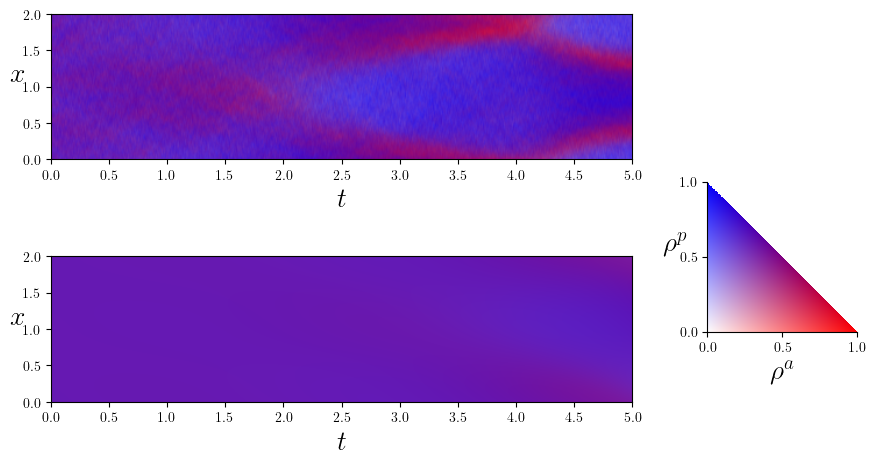

In [79]:
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, axs = plt.subplots(2, 1, figsize=(10,5))
# add image
    for (ax,rgb_image,ts) in zip(axs,(sim_rgb_image, pde_rgb_image), (sim_ts,pde_ts)  )
        ax.imshow(rgb_image; extent = [0,ts[end],0,Lx], interpolation = "bilinear")
        ax.get_xaxis().set_ticks(0:round(0.1*round(ts[end]); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:0.5:Lx)
        ax.set_xlabel(L"t", fontsize = 20)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 0)
        ax.set_aspect(ts[end]/Lx/4)
    end
    fig.tight_layout()

# add colour bars
    fig.subplots_adjust(right=0.6)
    cbar_ax = fig.add_axes([0.65, 0.3, 0.2, 0.3])

    ax = cbar_ax

    Δx = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δx:Δx:1, y in Δx:Δx:1, i in 1:3 ]  

    rgb_image = rho_to_rgb(cbar_f );

    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 0)
#
display(fig)

In [50]:
f = initiate_uniform_pde(ϕa, ϕp, Nx);
f = perturb_pde!(f, pde_param)


50×3 Matrix{Float64}:
 0.149531  0.151224  0.600877
 0.149573  0.151226  0.600721
 0.149622  0.151208  0.600554
 0.149677  0.151172  0.600378
 0.149736  0.151117  0.600196
 0.1498    0.151044  0.600011
 0.149867  0.150955  0.599826
 0.149936  0.150851  0.599643
 0.150007  0.150733  0.599467
 0.150077  0.150604  0.599298
 ⋮                   
 0.149524  0.150439  0.601448
 0.149491  0.150579  0.601473
 0.149466  0.15071   0.601474
 0.14945   0.15083   0.601453
 0.149442  0.150937  0.601408
 0.149442  0.151029  0.601341
 0.149452  0.151105  0.601253
 0.14947   0.151163  0.601145
 0.149497  0.151203  0.601019

In [58]:
pde_ts[end]

4.999009999979917